In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
df.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
335,Hyundai Verna CRDi 1.6 EX,2018,900000,25000,Diesel,Individual,Manual,First Owner
906,Hyundai Grand i10 Magna AT,2017,520000,10510,Petrol,Dealer,Automatic,First Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
df.duplicated().sum()

763

In [4]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(3577, 8)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [5]:
df["car_name"]=df["name"].str.split(" ").str.slice(0,2).str.join(" ")

In [6]:
car_values = df["car_name"].value_counts()
rare_cars = car_values[car_values<10].index
df["car_model"]=df["car_name"].apply(lambda x : "others" if x in rare_cars else x)

In [7]:
df["old"]=df["year"].apply(lambda x : 2023-x)

In [ ]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model,old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti 800,Maruti 800,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti Wagon,Maruti Wagon,16


In [8]:
df.drop(columns=["name","year","car_name"],inplace=True)

In [ ]:
df.describe()

,selling_price,km_driven,old
count,3.577000e+03,3577.000000,3577.000000
mean,4.739125e+05,69250.545709,10.037462
std,5.093018e+05,47579.940016,4.251759
min,2.000000e+04,1.000000,3.000000
25%,2.000000e+05,36000.000000,7.000000
50%,3.500000e+05,60000.000000,10.000000
75%,6.000000e+05,90000.000000,13.000000
max,8.900000e+06,806599.000000,31.000000


In [ ]:
df.describe(include="object")

,fuel,seller_type,transmission,owner,car_model
count,3577,3577,3577,3577,3577
unique,5,3,2,5,81
top,Diesel,Individual,Manual,First Owner,others
freq,1800,2832,3265,2218,354


<Axes: >

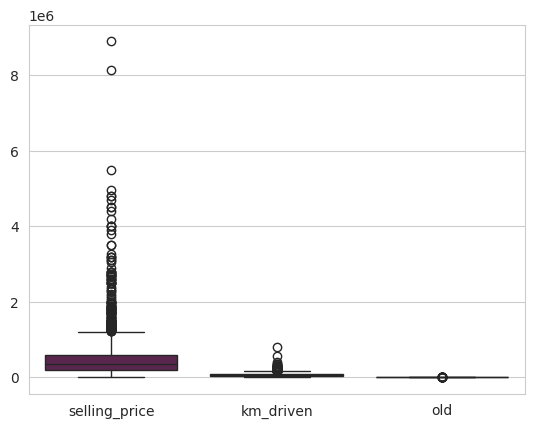

In [ ]:
sns.boxplot(df,palette="rocket")

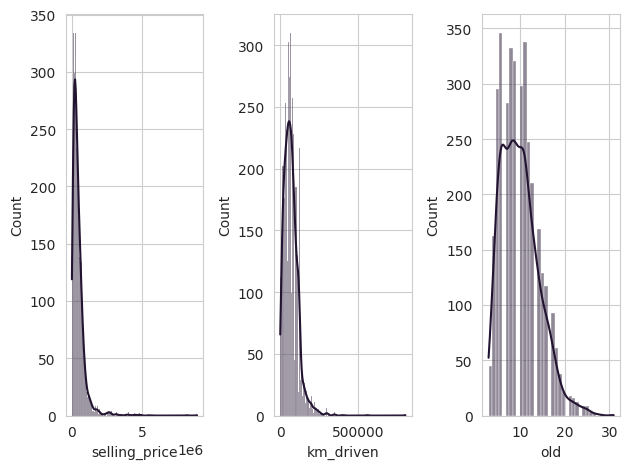

In [ ]:
plt.subplot(1,3,1)
sns.histplot(df["selling_price"],kde=True)
plt.subplot(1,3,2)
sns.histplot(df["km_driven"],kde=True)
plt.subplot(1,3,3)
sns.histplot(df["old"],kde=True)
plt.tight_layout()
plt.show()

In [9]:
Q1 = df["selling_price"].quantile(0.25)
Q3 = df["selling_price"].quantile(0.75)
IQR = Q3-Q1

higher_range = Q3+1.5*IQR
lower_range = Q1-1.5*IQR
print(higher_range,lower_range)

1200000.0 -400000.0


In [10]:
df=df[~(df["selling_price"]>higher_range)]

In [ ]:
df.shape

(3407, 8)

In [11]:
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3-Q1

higher_range = Q3+1.5*IQR
lower_range = Q1-1.5*IQR
print(higher_range,lower_range)

166018.5 -36697.5


In [12]:
df=df[~(df["km_driven"]>higher_range)]

In [ ]:
df.shape

(3287, 8)

In [13]:
Q1 = df["old"].quantile(0.25)
Q3 = df["old"].quantile(0.75)
IQR = Q3-Q1

higher_range = Q3+1.5*IQR
lower_range = Q1-1.5*IQR
print(higher_range,lower_range)

22.0 -2.0


In [14]:
df=df[~(df["old"]>higher_range)]

In [ ]:
df.shape

(3250, 8)

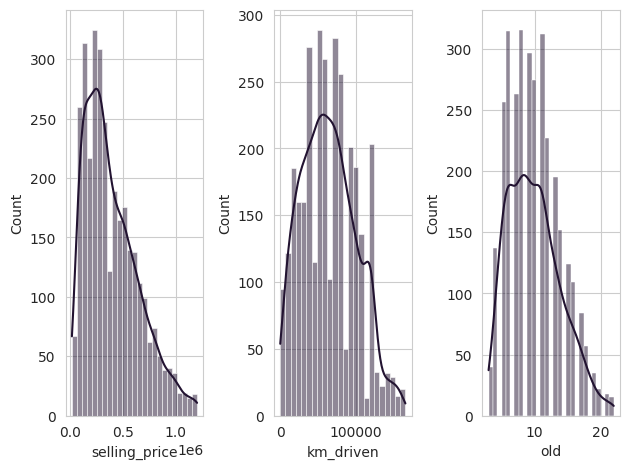

In [ ]:
plt.subplot(1,3,1)
sns.histplot(df["selling_price"],kde=True)
plt.subplot(1,3,2)
sns.histplot(df["km_driven"],kde=True)
plt.subplot(1,3,3)
sns.histplot(df["old"],kde=True)
plt.tight_layout()
plt.show()

<Axes: >

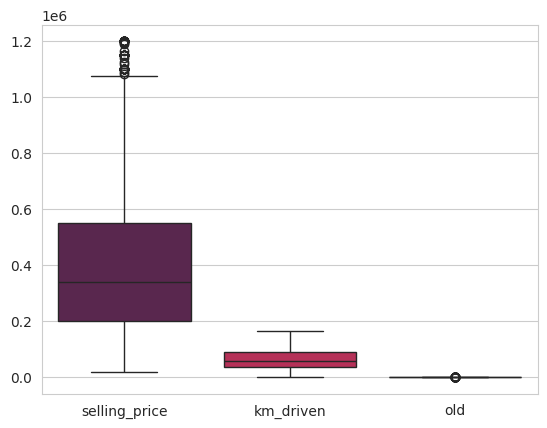

In [ ]:
sns.boxplot(df,palette="rocket")

In [ ]:
df.describe()

,selling_price,km_driven,old
count,3.250000e+03,3250.000000,3250.000000
mean,3.959742e+05,64819.204308,9.946154
std,2.524738e+05,36017.672687,3.994594
min,2.000000e+04,1.000000,3.000000
25%,2.000000e+05,37245.750000,7.000000
50%,3.400000e+05,60000.000000,9.500000
75%,5.500000e+05,90000.000000,12.000000
max,1.200000e+06,166000.000000,22.000000


In [ ]:
df.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_model,old
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti 800,16
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti Wagon,16


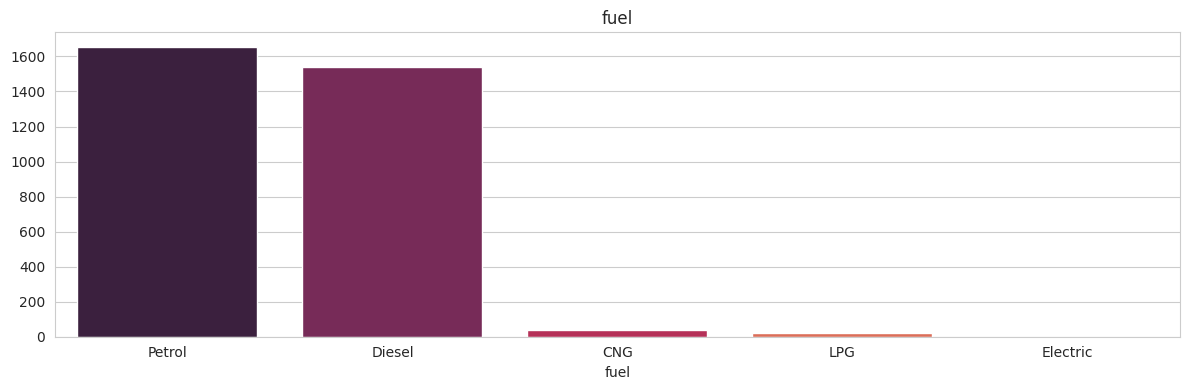

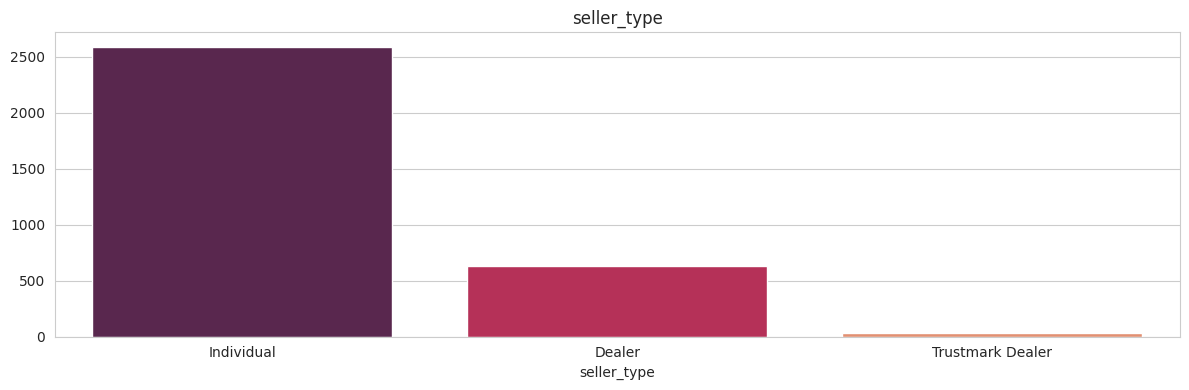

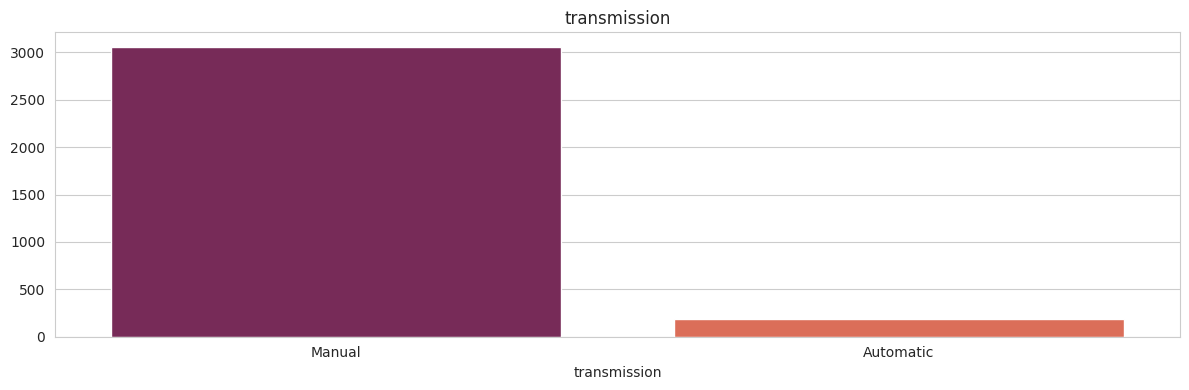

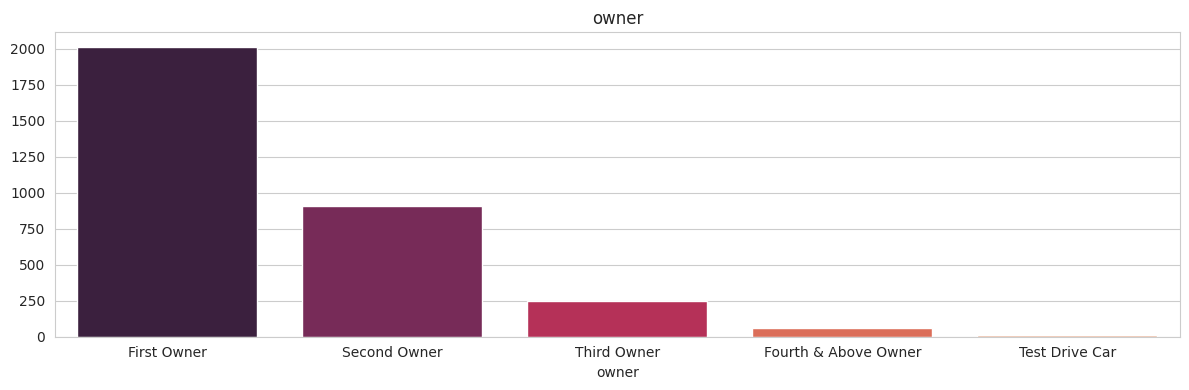

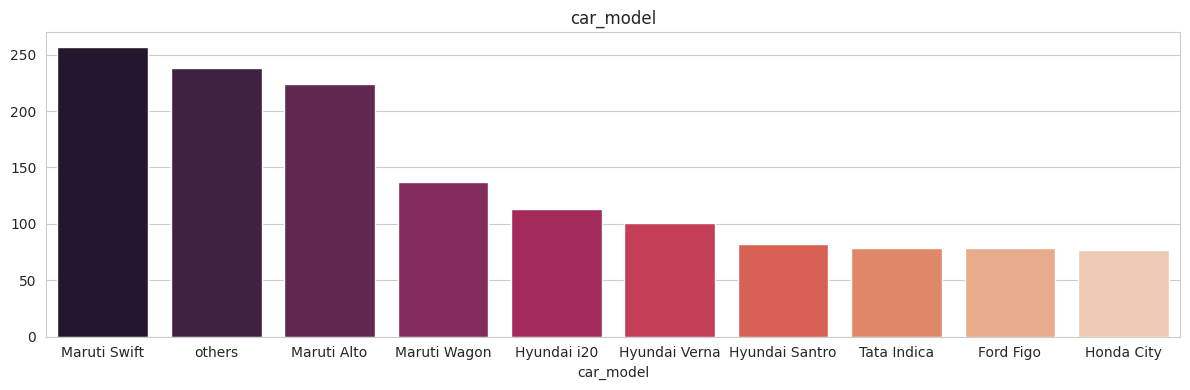

In [ ]:
cat_cols = df.select_dtypes(include="object")
for col in cat_cols:
  plt.figure(figsize=(12,4))
  sns.barplot(x=df[col].value_counts().index[:10],y=df[col].value_counts().values[:10],palette="rocket")
  plt.title(f"{col}")
  plt.tight_layout()
  plt.show()

In [15]:
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
transformer = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop="first",sparse=False,handle_unknown="ignore"),['fuel','seller_type','transmission','owner','car_model']),
                                              ('standar',StandardScaler(),["km_driven","old"])],remainder="passthrough")

In [19]:
X_train_tr = transformer.fit_transform(X_train)
X_test_tr = transformer.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [21]:
lr = LinearRegression()
lr.fit(X_train_tr,y_train)
y_pred = lr.predict(X_test_tr)

print("MAE : ",mean_absolute_error(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))

MAE :  85456.55986112021
MSE :  13489011396.71851
RMSE :  116142.20334020923
R2 Score :  0.7882351826821372


In [22]:
pipe = Pipeline([
    ('ct',transformer),
    ('lr',LinearRegression())
])

In [23]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'car_model']),
                                                 ('standar', StandardScaler(),
                                                  ['km_driven', 'old'])])),
                ('lr', LinearRegression())])

In [24]:
import joblib
joblib.dump(pipe,'car_model.pkl')

['car_model.pkl']